# Example1 - Getting started

In this first example we'll take a look at a simple 5 degrees of freedom (DOF) system. 

To access the data and the exact results of the system we can call the ```example_data()``` function under the submodule ```functions.gen```


In [1]:
import os
import sys
import numpy as np
# Add the directory we executed the script from to path:
sys.path.insert(0, os.path.realpath('__file__'))

# import the function to generate the example dataset
from pyoma2.functions.gen import example_data

# generate example data and results
data, ground_truth = example_data()

# Print the exact results
np.set_printoptions(precision=3)
print(f"the natural frequencies are: {ground_truth[0]} \n")
print(f"the damping is: {ground_truth[2]} \n")
print("the (column-wise) mode shape matrix: \n"
f"{ground_truth[1]} \n")

the natural frequencies are: [0.89  2.598 4.095 5.261 6.   ] 

the damping is: 0.02 

the (column-wise) mode shape matrix: 
[[-0.285 -0.764  1.    -0.919 -0.546]
 [-0.546 -1.     0.285  0.764  0.919]
 [-0.764 -0.546 -0.919  0.285 -1.   ]
 [-0.919  0.285 -0.546 -1.     0.764]
 [-1.     0.919  0.764  0.546 -0.285]] 



Now we can instantiate the ```SingleSetup``` class, passing the dataset and the sampling frequency as arguments

In [2]:
from pyoma2.setup.single import SingleSetup

simp_5dof = SingleSetup(data, fs=200)

Since the maximum frequency is at approximately 6Hz, we can decimate the signal quite a bit. To do this we can call the ```decimate_data()``` method

In [3]:
# Decimate the data by factor 10
simp_5dof.decimate_data(q=10)

To analise the data we need to instanciate the desired algorithm to use with a name and the required arguments.

In [4]:
from pyoma2.algorithms.fdd import FDD
from pyoma2.algorithms.ssi import SSIdat

# Initialise the algorithms
fdd = FDD(name="FDD", nxseg=1024, method_SD="cor")
ssidat = SSIdat(name="SSIdat", br=30, ordmax=30)

# Add algorithms to the class
simp_5dof.add_algorithms(fdd, ssidat)

# run
simp_5dof.run_all()

2024-09-10 00:49:21,114 - pyoma2.setup.base - INFO - Running FDD... (base:123)
2024-09-10 00:49:21,146 - pyoma2.setup.base - INFO - Running SSIdat... (base:123)
2024-09-10 00:49:21,151 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: dat... (ssi:82)
2024-09-10 00:49:21,564 - pyoma2.functions.ssi - INFO - SSI for increasing model order... (ssi:359)
100%|██████████| 31/31 [00:00<00:00, 6489.49it/s]
2024-09-10 00:49:21,579 - pyoma2.functions.ssi - INFO - Calculating modal parameters... (ssi:531)
100%|██████████| 30/30 [00:00<00:00, 1492.51it/s]
2024-09-10 00:49:21,764 - pyoma2.setup.base - INFO - all done (base:102)


We can now check the results

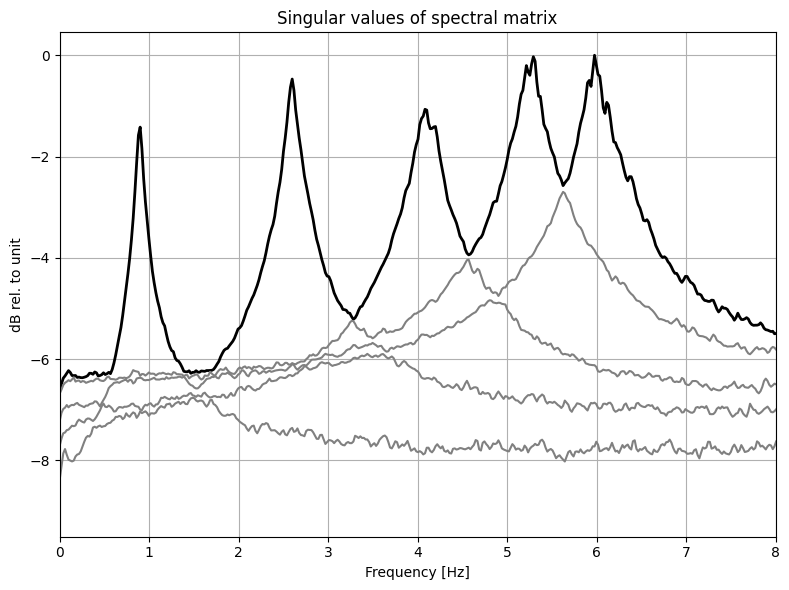

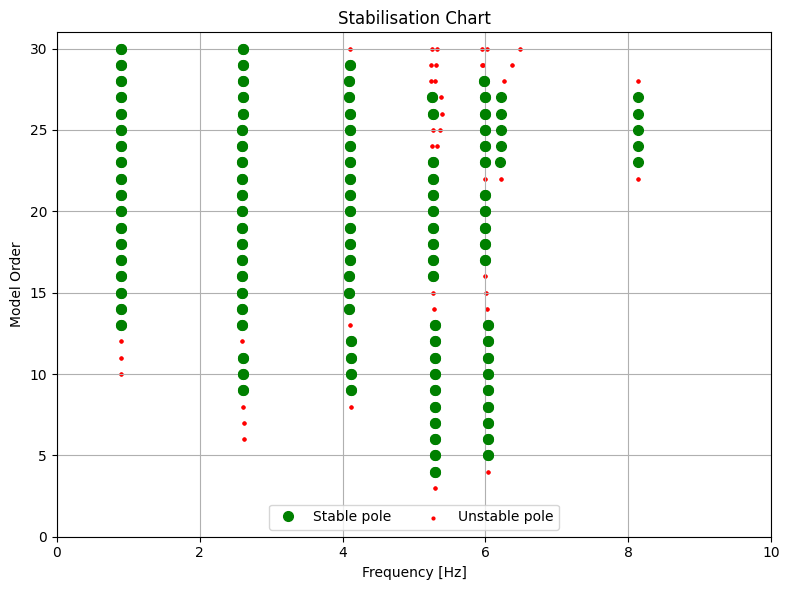

In [5]:
# plot singular values of the spectral density matrix
_, _ = fdd.plot_CMIF(freqlim=(0,8))

# plot the stabilisation diagram
_, _ = ssidat.plot_stab(freqlim=(0,10),hide_poles=False)

We can get the modal parameters with the help of an interactive plot calling the ```mpe_from_plot method()```, or we can get the results "manually" with the ```MPE()``` method.

In [6]:
# get the modal parameters with the interactive plot
# simp_ex.mpe_from_plot("SSIdat", freqlim=(0,10))

# or manually
simp_5dof.mpe("SSIdat", sel_freq=[0.89, 2.598, 4.095, 5.261, 6.], order="find_min")

2024-09-10 00:49:22,534 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIdat (base:149)
2024-09-10 00:49:22,539 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:866)


Now we can access all the results and compare them to the exact values

order out: 17 

the natural frequencies are: [0.891 2.596 4.097 5.263 5.998] 

the dampings are: [0.022 0.019 0.025 0.019 0.019] 

the (column-wise) mode shape matrix:
[[ 0.312  0.773  1.     0.926  0.537]
 [ 0.545  1.     0.279 -0.762 -0.912]
 [ 0.774  0.541 -0.912 -0.283  1.   ]
 [ 0.985 -0.285 -0.534  1.    -0.738]
 [ 1.    -0.942  0.749 -0.544  0.279]] 



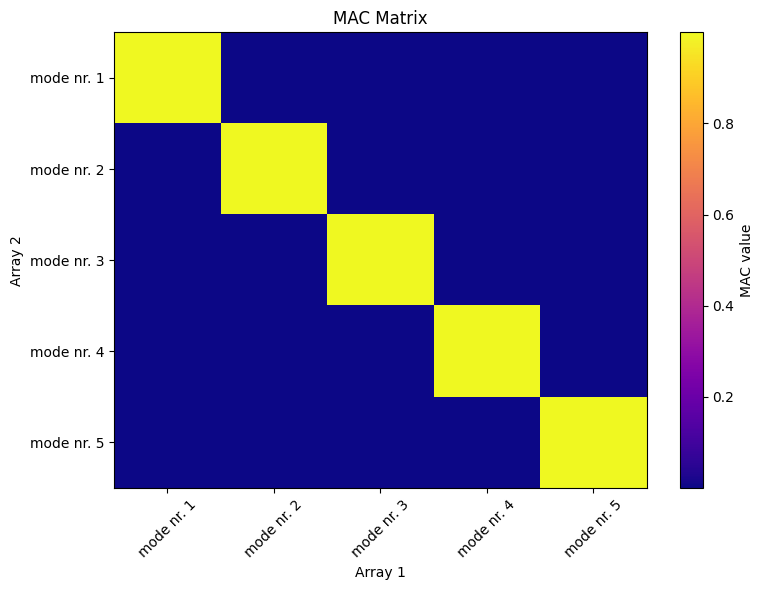

In [7]:
# dict of results
ssidat_res = dict(ssidat.result)

from pyoma2.functions.plot import plot_mac_matrix

# print the results
print(f"order out: {ssidat_res['order_out']} \n")
print(f"the natural frequencies are: {ssidat_res['Fn']} \n")
print(f"the dampings are: {ssidat_res['Xi']} \n")
print("the (column-wise) mode shape matrix:")
print(f"{ssidat_res['Phi'].real} \n")
_, _ = plot_mac_matrix(ssidat_res['Phi'].real, ground_truth[1])